In [3]:
import pandas as pd
import numpy as np

df_chl = pd.read_csv("chl_means_new.csv")
df_chl.head(5)

,Lat,Long,Ocean,Cr_nmol/kg,Year,chl_01,chl_02,chl_03,chl_04,chl_05,chl_06,chl_07,chl_08,chl_09,chl_10,chl_11,chl_12
0,21,-132,Pacific,NaN,1983.0,0.06898,0.062931,0.052969,0.047427,0.049164,0.048803,0.045213,0.042394,0.044499,0.049289,0.060621,0.066887
1,21,-132,Pacific,3.190219,1983.0,0.06898,0.062931,0.052969,0.047427,0.049164,0.048803,0.045213,0.042394,0.044499,0.049289,0.060621,0.066887
2,21,-132,Pacific,3.132063,1983.0,0.06898,0.062931,0.052969,0.047427,0.049164,0.048803,0.045213,0.042394,0.044499,0.049289,0.060621,0.066887
3,21,-132,Pacific,NaN,1983.0,0.06898,0.062931,0.052969,0.047427,0.049164,0.048803,0.045213,0.042394,0.044499,0.049289,0.060621,0.066887
4,21,-132,Pacific,3.424319,1983.0,0.06898,0.062931,0.052969,0.047427,0.049164,0.048803,0.045213,0.042394,0.044499,0.049289,0.060621,0.066887


In [7]:
month_name = ["01","02","03","04","05","06","07","08","09","10","11","12"]
df_chl['yearly_mean_chl'] = df_chl[['chl_' + month for month in month_name]].mean(axis=1)
df_chl.head(5)

,Lat,Long,Ocean,Cr_nmol/kg,Year,chl_01,chl_02,chl_03,chl_04,chl_05,chl_06,chl_07,chl_08,chl_09,chl_10,chl_11,chl_12,yearly_mean_chl
0,21,-132,Pacific,NaN,1983.0,0.06898,0.062931,0.052969,0.047427,0.049164,0.048803,0.045213,0.042394,0.044499,0.049289,0.060621,0.066887,0.053265
1,21,-132,Pacific,3.190219,1983.0,0.06898,0.062931,0.052969,0.047427,0.049164,0.048803,0.045213,0.042394,0.044499,0.049289,0.060621,0.066887,0.053265
2,21,-132,Pacific,3.132063,1983.0,0.06898,0.062931,0.052969,0.047427,0.049164,0.048803,0.045213,0.042394,0.044499,0.049289,0.060621,0.066887,0.053265
3,21,-132,Pacific,NaN,1983.0,0.06898,0.062931,0.052969,0.047427,0.049164,0.048803,0.045213,0.042394,0.044499,0.049289,0.060621,0.066887,0.053265
4,21,-132,Pacific,3.424319,1983.0,0.06898,0.062931,0.052969,0.047427,0.049164,0.048803,0.045213,0.042394,0.044499,0.049289,0.060621,0.066887,0.053265


In [6]:
for col in df_chl.columns:
    if 'chl' in col:
        print(f"Correlation between 'Cr_nmol/kg' and '{col}': {df_chl['Cr_nmol/kg'].corr(df_chl[col])}")

Correlation between 'Cr_nmol/kg' and 'chl_01': 0.2222380030471767
Correlation between 'Cr_nmol/kg' and 'chl_02': 0.239509176886822
Correlation between 'Cr_nmol/kg' and 'chl_03': 0.1575600091263584
Correlation between 'Cr_nmol/kg' and 'chl_04': 0.07302255062946351
Correlation between 'Cr_nmol/kg' and 'chl_05': -0.06234617009495116
Correlation between 'Cr_nmol/kg' and 'chl_06': -0.08492823354130775
Correlation between 'Cr_nmol/kg' and 'chl_07': -0.06148940897283865
Correlation between 'Cr_nmol/kg' and 'chl_08': 0.017685228049793285
Correlation between 'Cr_nmol/kg' and 'chl_09': 0.03633780981839884
Correlation between 'Cr_nmol/kg' and 'chl_10': 0.20825374588132703
Correlation between 'Cr_nmol/kg' and 'chl_11': 0.20822047938850002
Correlation between 'Cr_nmol/kg' and 'chl_12': 0.17539221611321804
Correlation between 'Cr_nmol/kg' and 'yearly_mean_chl': 0.11206869836067768


In [12]:
#From the code above, we find that the correlation between CHL and Chromium concentration is very little

0          0.053265
1          0.053265
2          0.053265
3          0.053265
4          0.053265
           ...     
1062   -9999.000000
1063   -7499.145597
1064   -7499.145597
1065   -7499.145597
1066   -7499.145597
Name: yearly_mean_chl, Length: 1067, dtype: float64

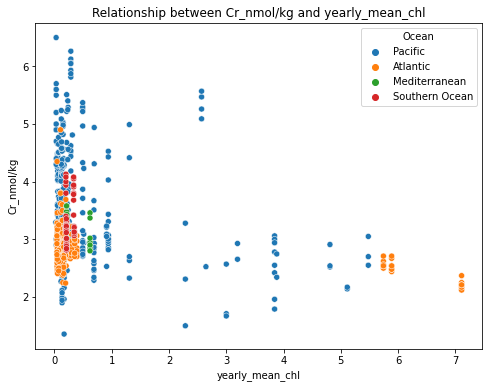

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

df_chl[df_chl['yearly_mean_chl'] < 0] = np.nan #Remove points with missing data since missing data are filled with -9999

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_chl, x='yearly_mean_chl', y='Cr_nmol/kg', hue='Ocean')
plt.title('Relationship between Cr_nmol/kg and yearly_mean_chl')
plt.show()